In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import time
import matplotlib.pyplot as plt

Animal Center Intakes from Oct, 1st 2013 to present. Intakes represent the status of animals as they arrive at the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners.

Link: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm

In [2]:
df_i = pd.read_csv('Austin_Animal_Center_Intakes.csv') #Intakes
df_i.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A794208,NaN,05/04/2019 07:20:00 PM,05/04/2019 07:20:00 PM,13021 Dessau Road in Austin (TX),Stray,Normal,Cat,Unknown,1 year,Domestic Shorthair Mix,Black
1,A794209,NaN,05/04/2019 07:20:00 PM,05/04/2019 07:20:00 PM,13021 Dessau Road in Austin (TX),Stray,Normal,Cat,Unknown,1 year,Domestic Shorthair Mix,Orange
2,A794206,NaN,05/04/2019 07:02:00 PM,05/04/2019 07:02:00 PM,4611 Mellow Hollow in Austin (TX),Stray,Normal,Dog,Intact Female,2 years,Pit Bull Mix,Chocolate/White
3,A794207,NaN,05/04/2019 06:56:00 PM,05/04/2019 06:56:00 PM,2025 East 7Th Street in Austin (TX),Stray,Normal,Cat,Unknown,1 year,Domestic Shorthair Mix,White/Lynx Point
4,A794205,Neala,05/04/2019 06:33:00 PM,05/04/2019 06:33:00 PM,5617 Victory Gallop Drive in Austin (TX),Stray,Normal,Dog,Unknown,2 years,Great Dane,Black/Gray


Animal Center Outcomes from Oct, 1st 2013 to present. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. The Outcomes data set reflects that Austin, TX. is the largest "No Kill" city in the country... 

Link: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

In [3]:
df_o = pd.read_csv('Austin_Animal_Center_Outcomes.csv') #Outcomes
df_o.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A793602,NaN,05/04/2019 07:16:00 PM,05/04/2019 07:16:00 PM,04/27/2018,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,Cream
1,A794180,NaN,05/04/2019 06:27:00 PM,05/04/2019 06:27:00 PM,11/04/2018,Transfer,Partner,Other,Intact Male,5 months,Rabbit Sh Mix,White/Tricolor
2,A788078,Romeo,05/04/2019 06:25:00 PM,05/04/2019 06:25:00 PM,11/04/2007,Return to Owner,NaN,Dog,Neutered Male,11 years,Dachshund Mix,Tricolor/Black
3,A687107,Montopolis,05/04/2019 06:14:00 PM,05/04/2019 06:14:00 PM,12/01/2013,Rto-Adopt,NaN,Dog,Neutered Male,5 years,Rhod Ridgeback,Red/Brown
4,A793449,Bailey,05/04/2019 06:10:00 PM,05/04/2019 06:10:00 PM,04/25/2018,Adoption,NaN,Dog,Spayed Female,1 year,Basset Hound Mix,White/Brown


In [4]:
for i in range(len(df_o)):
    df_o['DateTime'][i] = dt.strptime(df_o['DateTime'][i], "%m/%d/%Y %H:%M:%S %p") # Convert str to datetime
for i in range(len(df_i)):
    df_i['DateTime'][i] = dt.strptime(df_i['DateTime'][i], "%m/%d/%Y %H:%M:%S %p") # Convert str to datetime

In [5]:
# Drop some columns
df_i = df_i.drop(columns=['Name', 'MonthYear', 'Found Location', 'Intake Type'])
df_o = df_o.drop(columns=['Name', 'MonthYear', 'Date of Birth'])

In [7]:
#Merge dataframes
df_io = pd.merge(df_i, df_o, how='inner', left_on='Animal ID', right_on='Animal ID')
df_io.head()

,Animal ID,DateTime_x,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,Breed_x,Color_x,DateTime_y,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y
0,A793374,2019-05-04 05:00:00,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White,2019-04-28 09:50:00,Adoption,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White
1,A793374,2019-04-24 11:01:00,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White,2019-04-28 09:50:00,Adoption,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White
2,A623261,2019-05-04 04:33:00,Normal,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White,2019-03-31 04:10:00,Adoption,NaN,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White
3,A623261,2019-02-22 12:35:00,Normal,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White,2019-03-31 04:10:00,Adoption,NaN,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White
4,A790784,2019-05-04 04:25:00,Normal,Dog,Spayed Female,1 year,Keeshond Mix,Black/Brown,2019-03-21 07:03:00,Adoption,NaN,Dog,Spayed Female,1 year,Keeshond Mix,Black/Brown


Some animals come back to the center several times, so IDs are duplicated. Need to get rid of them.

In [10]:
df_io['Period']= df_io['DateTime_y'] - df_io['DateTime_x']

In [13]:
idx = df_io.groupby(['Animal ID'])['Period'].transform(max) == df_io['Period'] # indices survive only if period is max for ID
df_io = df_io[idx]
df_io = df_io.drop(columns=['Breed_x','Color_x', 'Animal Type_x'])

Find an average period until adoption for each animals.

In [14]:
P_animal = df_io.groupby(['Animal Type_y'])['Period'].mean(numeric_only=False)
P_animal.astype('timedelta64[D]') #Data converted to total days (dtype:float64)

Animal Type_y
Bird          8.0
Cat          30.0
Dog          54.0
Livestock    73.0
Other         4.0
Name: Period, dtype: float64

Text(0.5,1,'Period until Adoption')

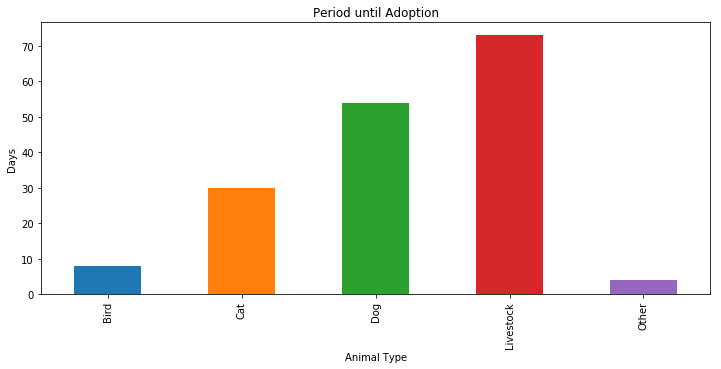

In [15]:
plt.figure(figsize=(12,5))

P_animal.astype('timedelta64[D]').plot(kind = 'bar')
plt.xlabel('Animal Type')
plt.ylabel('Days')
#plt.xticks(np.arange(5), ('Bird', 'Cat', 'Dog', 'Livestock', 'Other'))
plt.title('Period until Adoption')

Show whether breed of cats or dogs effects on the period until adoption.

In [16]:
df_cat = df_io[df_io['Animal Type_y'] == 'Cat']
df_cat.head()

,Animal ID,DateTime_x,Intake Condition,Sex upon Intake,Age upon Intake,DateTime_y,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y,Period
24,A756291,2017-08-17 11:45:00,Normal,Intact Female,1 month,2017-08-22 12:30:00,Transfer,Partner,Cat,Intact Female,2 months,Domestic Shorthair Mix,Brown Tabby,5 days 00:45:00
36,A794141,2019-05-04 12:20:00,Normal,Unknown,2 days,2019-05-04 01:00:00,Transfer,Partner,Cat,Unknown,2 days,Domestic Shorthair Mix,Blue,-1 days +12:40:00
37,A794140,2019-05-04 12:20:00,Normal,Unknown,2 days,2019-05-04 01:00:00,Transfer,Partner,Cat,Unknown,2 days,Domestic Shorthair Mix,Black,-1 days +12:40:00
38,A794139,2019-05-04 12:20:00,Normal,Unknown,2 days,2019-05-04 01:00:00,Transfer,Partner,Cat,Unknown,2 days,Domestic Shorthair Mix,Black,-1 days +12:40:00
39,A794138,2019-05-04 12:18:00,Normal,Unknown,3 days,2019-05-04 12:59:00,Transfer,Partner,Cat,Unknown,3 days,Domestic Shorthair,Black,0 days 00:41:00


In [18]:
df_dog = df_io[df_io['Animal Type_y'] == 'Dog']
df_dog.head()

,Animal ID,DateTime_x,Intake Condition,Sex upon Intake,Age upon Intake,DateTime_y,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y,Period
1,A793374,2019-04-24 11:01:00,Normal,Spayed Female,2 years,2019-04-28 09:50:00,Adoption,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White,3 days 22:49:00
3,A623261,2019-02-22 12:35:00,Normal,Spayed Female,9 years,2019-03-31 04:10:00,Adoption,NaN,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White,36 days 15:35:00
5,A790784,2019-03-16 01:27:00,Normal,Intact Female,1 year,2019-03-21 07:03:00,Adoption,NaN,Dog,Spayed Female,1 year,Keeshond Mix,Black/Brown,5 days 05:36:00
6,A794184,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:41:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,White,0 days 01:28:00
7,A794186,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:42:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,0 days 01:29:00


In [19]:
df_cat_m = df_cat[df_cat['Breed_y'].str.contains('Mix')] #Mix cats
df_cat_mn = df_cat[~df_cat['Breed_y'].str.contains('Mix')] #Non-mix cats
P_cat_m = df_cat_m['Period'].mean(numeric_only=False) #average period for mixed cats
P_cat_m

Timedelta('30 days 02:52:04.569312')

In [20]:
P_cat_mn = df_cat_mn['Period'].mean(numeric_only=False) #average period for non-mixed cats
P_cat_mn

Timedelta('33 days 22:26:32.112676')

In [21]:
df_dog_m = df_dog[df_dog['Breed_y'].str.contains('Mix')] #Mix dogs
df_dog_mn = df_dog[~df_dog['Breed_y'].str.contains('Mix')] #Mix dogs
P_dog_m = df_dog_m['Period'].mean(numeric_only=False) #average period for mixed dogs
P_dog_m

Timedelta('53 days 06:31:56.980121')

In [22]:
P_dog_mn = df_dog_mn['Period'].mean(numeric_only=False) #average period for non-mixed dogs
P_dog_mn

Timedelta('56 days 16:37:47.191256')

Show whether Neutralization surgery effect on period until adoption.

In [24]:
df_cat_s = df_cat[~df_cat['Sex upon Outcome'].str.contains('Intact')] #neutered, spayed cats
df_cat_ns = df_cat[df_cat['Sex upon Outcome'].str.contains('Intact')] #Intact cats

In [25]:
P_cat_s = df_cat_s['Period'].mean(numeric_only=False) #average period for neuterd cats
P_cat_s

Timedelta('42 days 01:00:07.393646')

In [26]:
P_cat_ns = df_cat_ns['Period'].mean(numeric_only=False) #average period for intact cats
P_cat_ns

Timedelta('6 days 03:56:00.757164')

In [27]:
df_dog_s = df_dog[~df_dog['Sex upon Outcome'].str.contains('Intact', na=False)] #neutered, spayed dogs
df_dog_ns = df_dog[df_dog['Sex upon Outcome'].str.contains('Intact', na=False)] #Intact dogs

In [28]:
P_dog_s = df_dog_s['Period'].mean(numeric_only=False) #average period for neutered cats
P_dog_s

Timedelta('64 days 06:23:20.703749')

In [29]:
P_dog_ns = df_dog_ns['Period'].mean(numeric_only=False) #average period for intact cats
P_dog_ns

Timedelta('18 days 08:53:50.692660')

In [30]:
data = np.array([42, 6, 64, 18])
S = pd.Series(data, index=['Neuterd, Spayed cat', 'Intact cat', 'Neutered, Spayed dog', 'Intact dog'])

Text(0.5,1,'Period until Adoption')

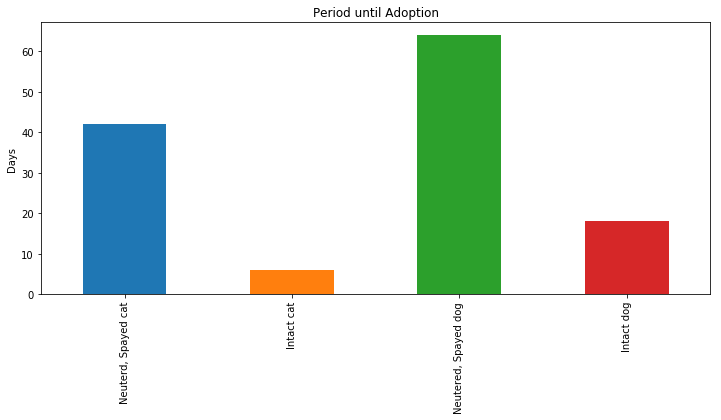

In [31]:
plt.figure(figsize=(12,5))

S.plot(kind = 'bar')
plt.ylabel('Days')
plt.title('Period until Adoption')